In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
from warnings import filterwarnings
filterwarnings("ignore")

In [10]:
A=pd.read_csv("C:/Users/Dell/Desktop/backup/50_Startups.csv")

In [12]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Univariate Analysis (Quantitative)

<AxesSubplot:xlabel='PROFIT', ylabel='Density'>

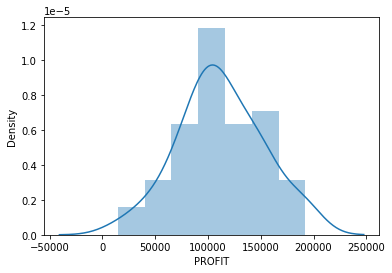

In [13]:
sb.distplot(A.PROFIT)

<AxesSubplot:>

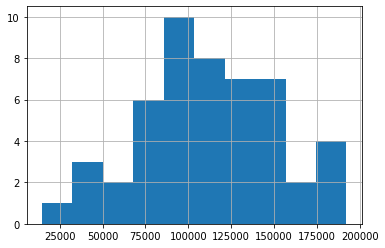

In [14]:
A.PROFIT.hist()

In [15]:
A=pd.read_csv("C:/Users/Dell/Cars93.csv")

In [16]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [17]:
A=A.drop(["id","Make","Model"],axis=1)

In [18]:
A.isna().sum()

Manufacturer           0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
dtype: int64

In [19]:
def filler(a):
    import pandas as pd
    Q=pd.DataFrame(a.isna().sum(),columns=["Ct"])
    W=Q[Q.Ct>0].index
    for i in W:
        if a[i].dtypes=="object":
            X=a[i].mode()[0]
            a[i]=a[i].fillna(X)
        else:
            X=a[i].mean()
            a[i]=a[i].fillna(X)

In [20]:
filler(A)

In [22]:
# A.isna().sum()

In [24]:
cat=[]
con=[]
for i in A:
    if A[i].dtypes=="object":
        cat.append(i)
    else:
        con.append(i)

In [26]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room',
 'Weight']

In [27]:
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

## Create distribution plot for all continuous columns

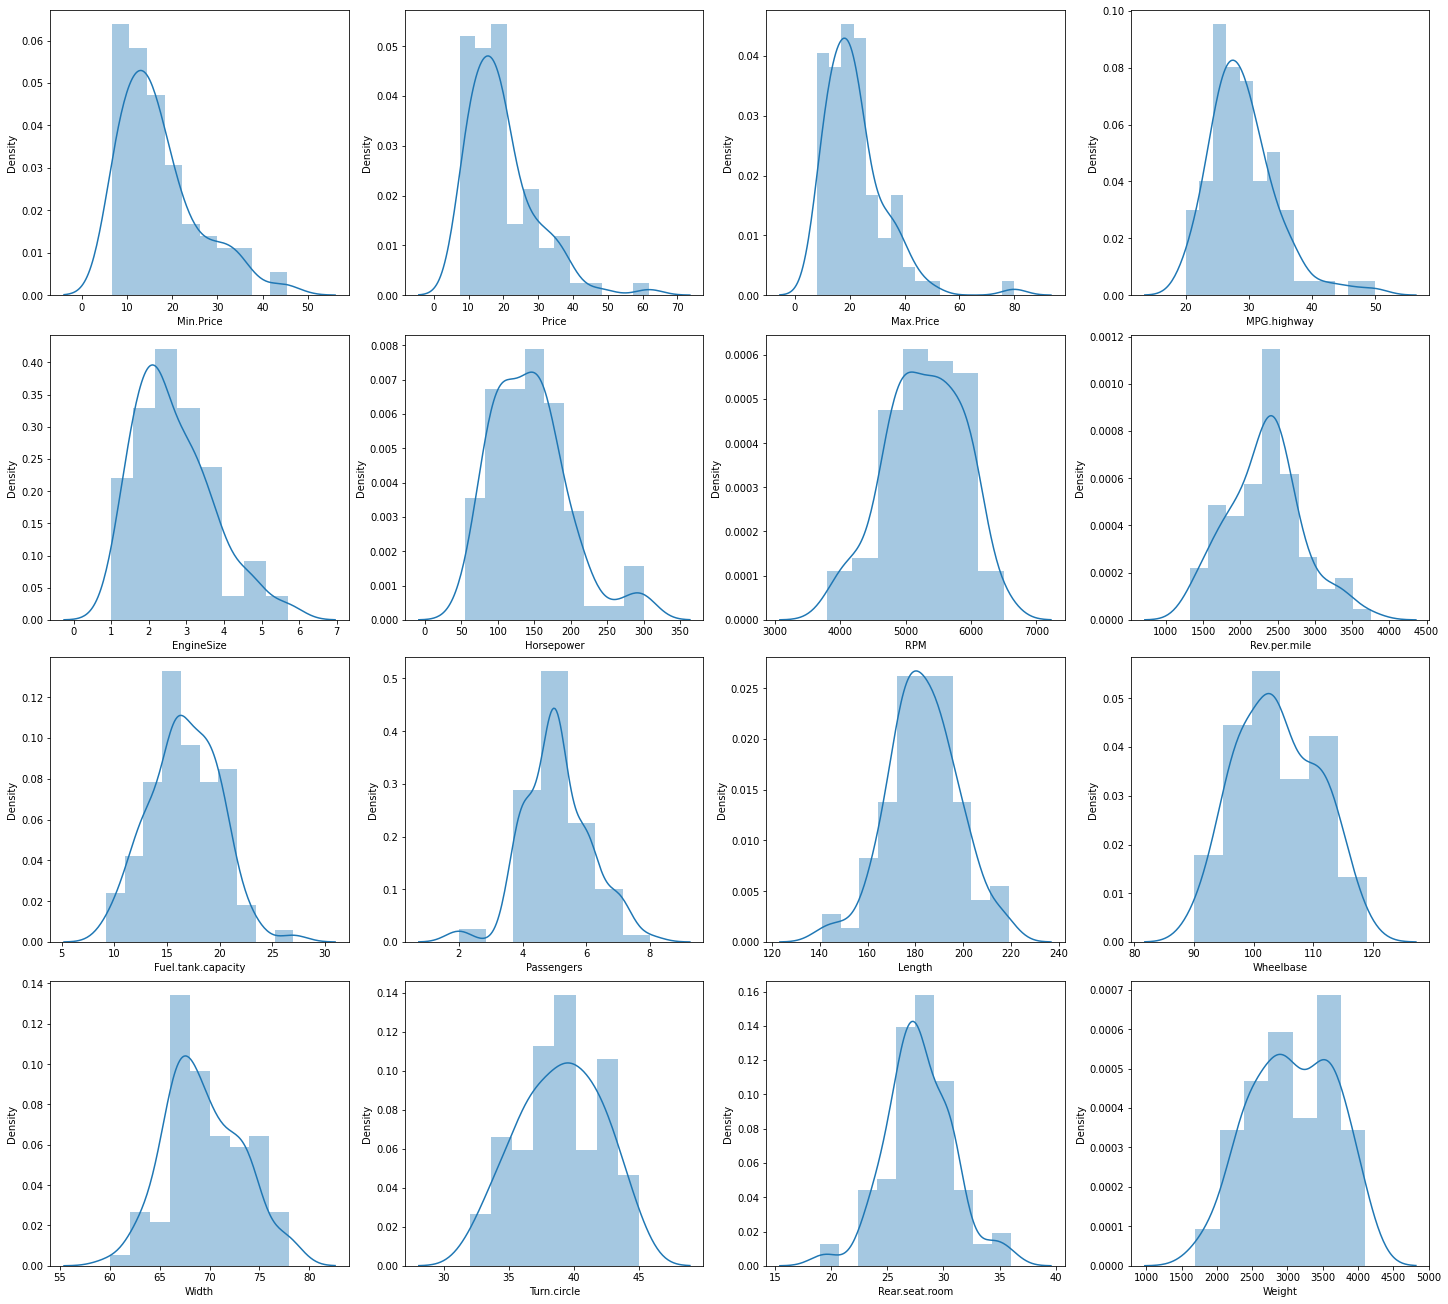

In [55]:
plt.figure(figsize=(20,18),constrained_layout=True)
plt.subplot(4,4,1)
sb.distplot(A['Min.Price'])
plt.subplot(4,4,2)
sb.distplot(A['Price'])
plt.subplot(4,4,3)
sb.distplot(A['Max.Price'])
plt.subplot(4,4,4)
sb.distplot(A['MPG.highway'])
plt.subplot(4,4,5)
sb.distplot(A['EngineSize'])
plt.subplot(4,4,6)
sb.distplot(A['Horsepower'])
plt.subplot(4,4,7)
sb.distplot(A['RPM'])
plt.subplot(4,4,8)
sb.distplot(A['Rev.per.mile'])
plt.subplot(4,4,9)
sb.distplot(A['Fuel.tank.capacity'])
plt.subplot(4,4,10)
sb.distplot(A['Passengers'])
plt.subplot(4,4,11)
sb.distplot(A['Length'])
plt.subplot(4,4,12)
sb.distplot(A['Wheelbase'])
plt.subplot(4,4,13)
sb.distplot(A['Width'])
plt.subplot(4,4,14)
sb.distplot(A['Turn.circle'])
plt.subplot(4,4,15)
sb.distplot(A['Rear.seat.room'])
plt.subplot(4,4,16)
sb.distplot(A['Weight'])
plt.show()

In [68]:
nrows = len(con)/3
int(nrows)

6

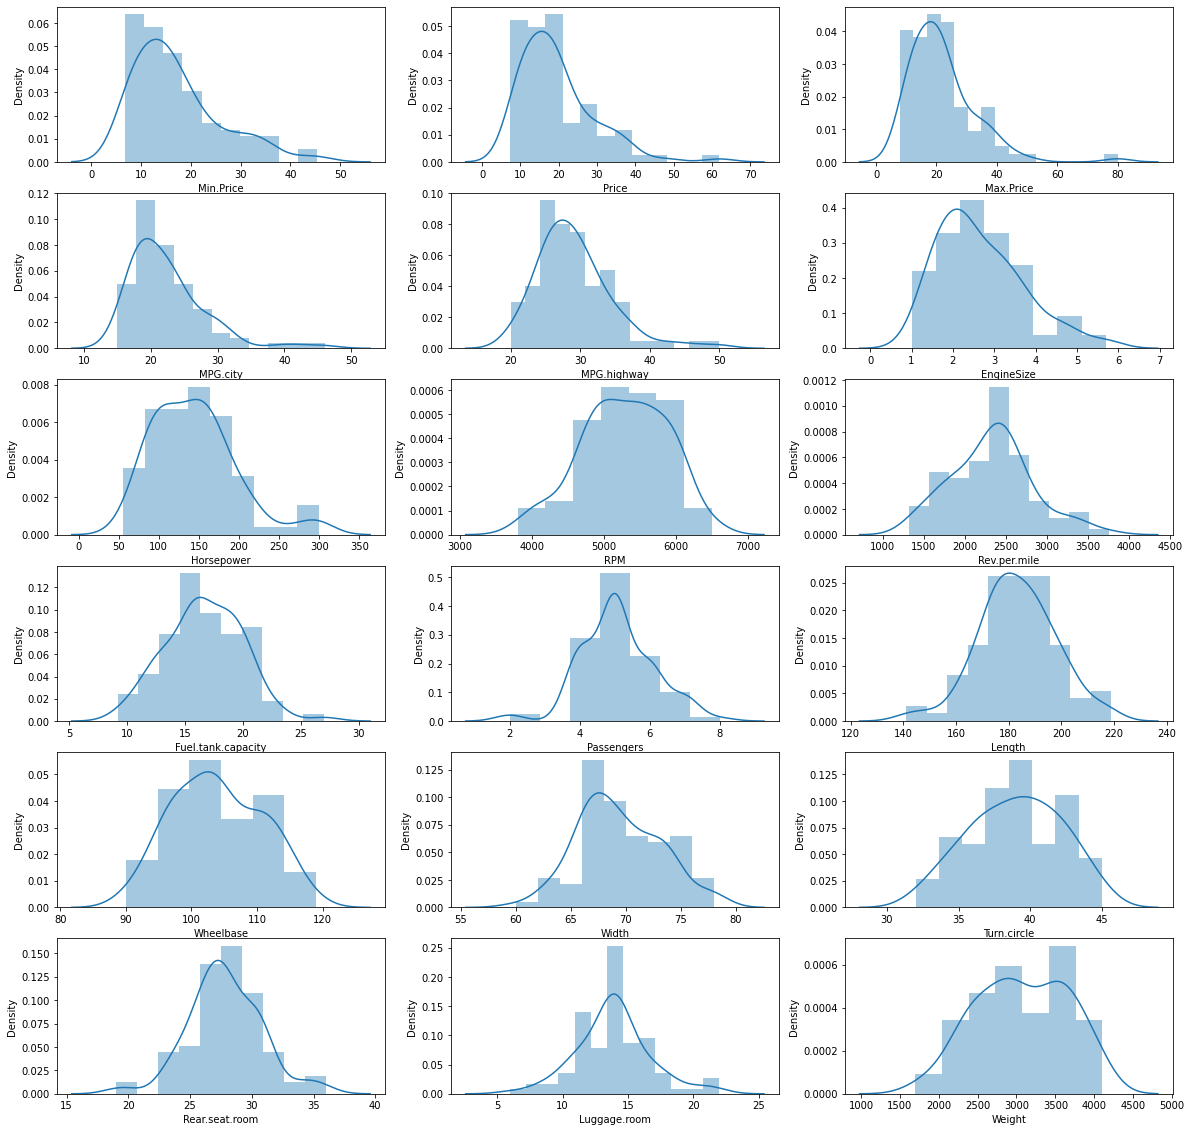

In [70]:
plt.figure(figsize=(20,20))
w = 1
for i in con:
    plt.subplot(6,3,w)
    sb.distplot(A[i])
    w = w + 1

## Univariate Analysis(Categorical)

In [71]:
A.AirBags.value_counts()

Driver only           46
None                  33
Driver & Passenger    14
Name: AirBags, dtype: int64

<AxesSubplot:>

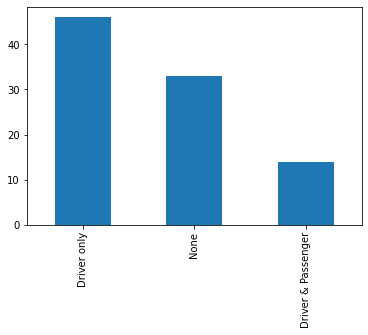

In [72]:
A.AirBags.value_counts().plot(kind="bar")

<AxesSubplot:>

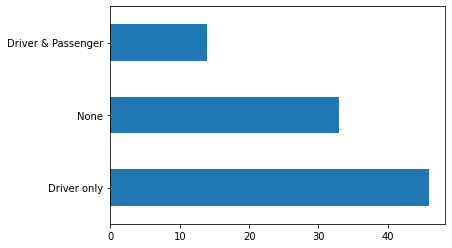

In [73]:
A.AirBags.value_counts().plot(kind="barh")

<AxesSubplot:ylabel='AirBags'>

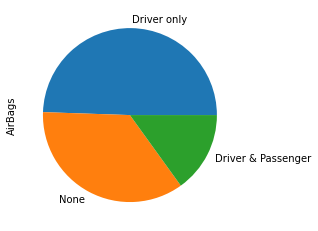

In [74]:
A.AirBags.value_counts().plot(kind="pie")

In [76]:
nrows = round(len(cat)/3,0)+1
nrows


3.0

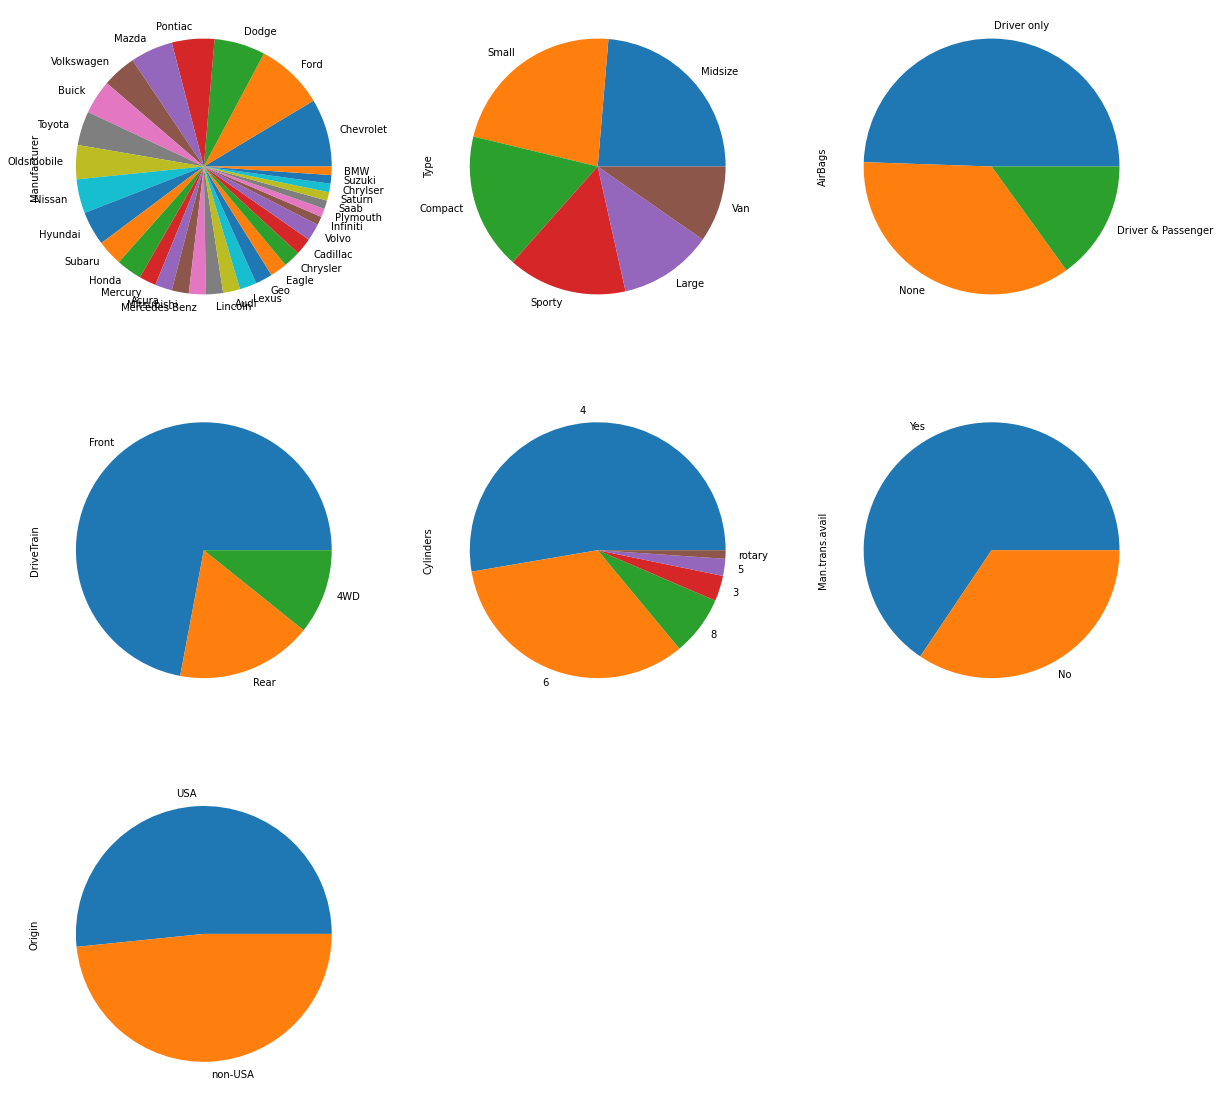

In [78]:
plt.figure(figsize=(20,20))
w = 1
for i in cat:
    plt.subplot(3,3,w)
    A[i].value_counts().plot(kind="pie")
    w = w + 1

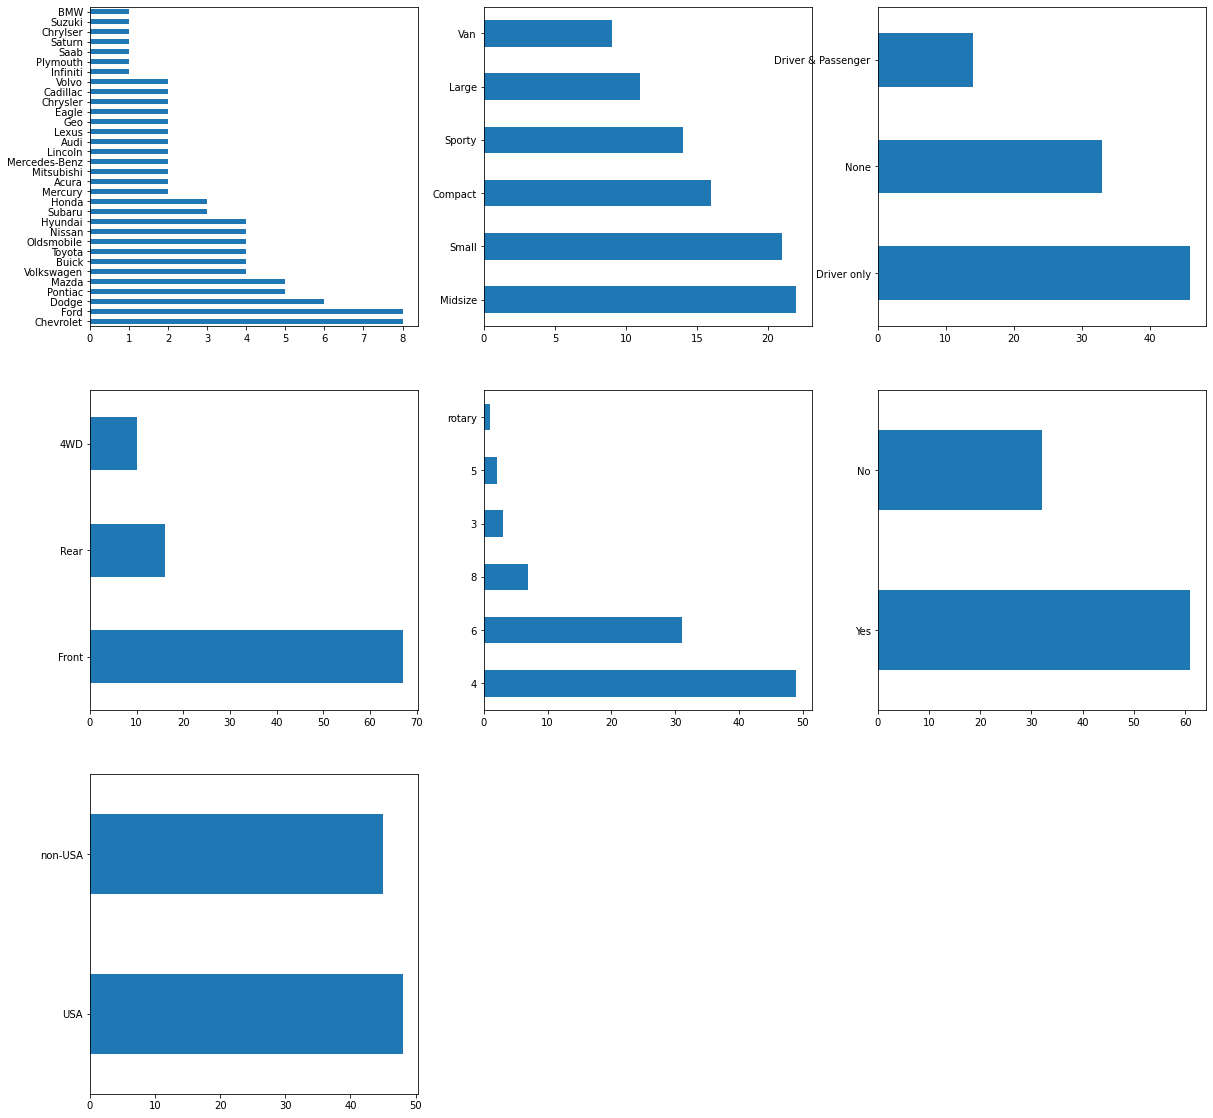

In [80]:
plt.figure(figsize=(20,20))
w = 1
for i in cat:
    plt.subplot(3,3,w)
    A[i].value_counts().plot(kind="barh")
    w = w + 1

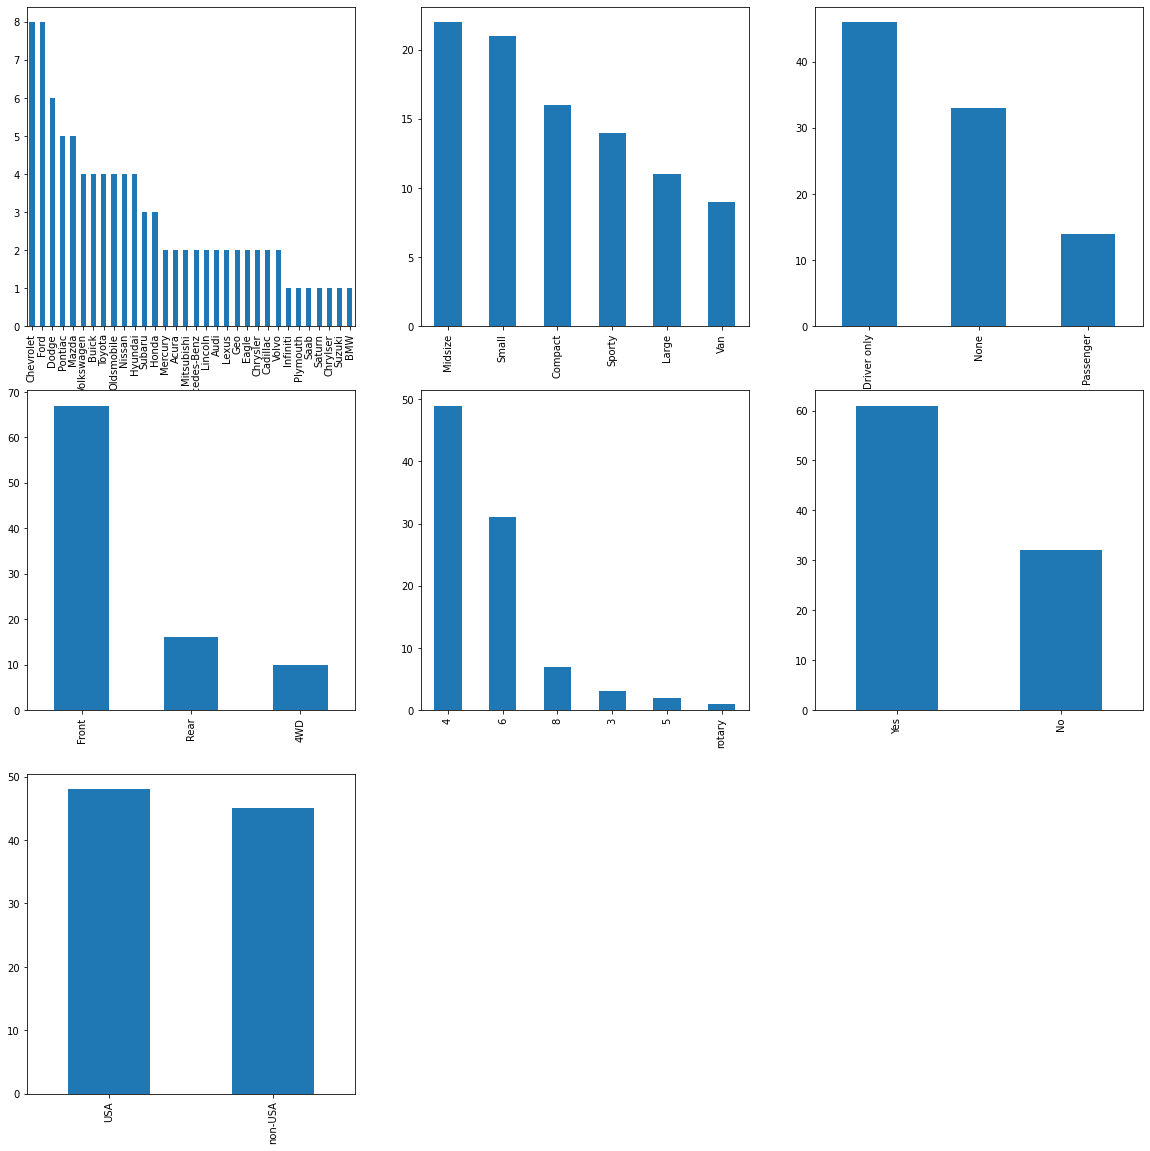

In [83]:

plt.figure(figsize=(20,20))
w = 1
for i in cat:
    plt.subplot(3,3,w)
    A[i].value_counts().plot(kind="bar")
    w = w + 1

## Bivariate Analysis (Scatterplot)

<AxesSubplot:xlabel='Price', ylabel='MPG.highway'>

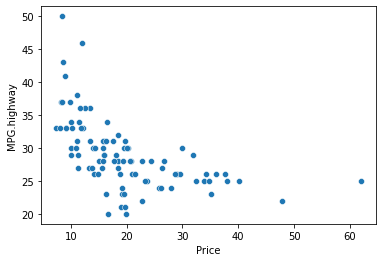

In [84]:
sb.scatterplot(A.Price,A['MPG.highway'])

In [85]:
B=pd.read_csv("C:/Users/Dell/Desktop/backup/50_Startups.csv")

In [86]:
B.head(3)

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


<AxesSubplot:xlabel='RND', ylabel='PROFIT'>

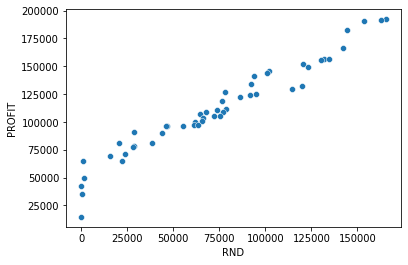

In [87]:
sb.scatterplot(B.RND,B.PROFIT)

Text(0.5, 1.0, 'RND vs Profit Scatterplot')

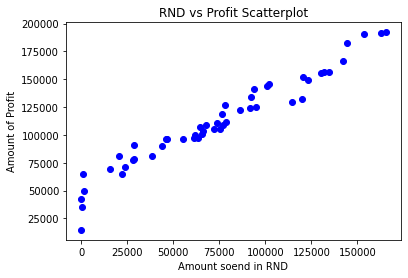

In [88]:
import matplotlib.pyplot as plt
plt.scatter(B.RND,B.PROFIT,c="blue")
plt.xlabel("Amount soend in RND")
plt.ylabel("Amount of Profit")
plt.title("RND vs Profit Scatterplot")